## Logistic Equation with harvest

Source https://en.wikipedia.org/wiki/Van_der_Pol_oscillator

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/2e9748620372632fc912d764f4589a32f0626658)
![](https://wikimedia.org/api/rest_v1/media/math/render/svg/11faf7b7f0e57ce9577592ce6a6e186b81ba7bb2)

In [1]:
%pylab inline
import plotly.offline as pyo
import plotly.express as px
from ipywidgets import widgets, interactive_output, interact
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from IPython.display import display

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Import the necessaries libraries
import plotly.offline as pyo
import plotly.graph_objs as go
# Set notebook mode to work in offline
pyo.init_notebook_mode()

In [15]:
class vanderpol(object):
    
    """
    
    Parameters
    ------------

    X0:             initial prey Population
    Y0:             initial predator Population
    n_itr:          total no of iterations
    
    Attributes
    ------------
    time: stores the values of time for all iterations
    X: stores the values of prey population for all iterations
    Y: stores the values of predator population for all iterations
    
    Methods
    ------------
    Forward Euler Method for solving PDE
    
    """
    
    def __init__(self,X0,Y0,delta_t,n_itr):
        
        self.X0      = X0
        self.Y0      = Y0
        
        self.delta_t = delta_t
        self.n_itr   = n_itr
        
    def euler(self):
        
        self.time  = np.zeros(self.n_itr)
        self.X     = np.zeros(self.n_itr)
        self.Y     = np.zeros(self.n_itr)

        #assign inital varaibles
        self.X[0] = self.X0
        self.Y[0] = self.Y0
        
        # carry iterations
        for i in range(self.n_itr-1):

            self.time[i+1]   = self.time[i]  + self.delta_t
            
            ## Main equations
            #prey equation
            self.X[i+1]  = self.X[i] + self.delta_t*(self.Y[i])
            #predator equation
            self.Y[i+1]  = self.Y[i] + self.delta_t*(-self.X[i]+(1-(self.X[i])**2)*self.Y[i])
            


        return self

In [35]:
def plot_vanderpol(X0,Y0,delta_t,n_itr):
    
    
    vp= vanderpol(X0,Y0,delta_t,n_itr).euler()
    print(delta_t)
    plot_data(vp)
    plot_time_series(vp)
    plot_neighbour_Series(vp)
    
    
    

In [36]:
def plot_data(vp):
    
   
    fig = go.Figure(data=[go.Scattergl(
                                        x=vp.X,
                                        y=vp.Y,
                                        mode='markers',
                                        marker=dict(size=3,color=[i for i in range(vp.X.shape[0])]),
                                        )])


    fig.show()


In [37]:
def plot_time_series(vp):
    
    fig = make_subplots(rows=1, cols=2,subplot_titles=["X time series","Y time series"])


    fig.add_trace(go.Scattergl(
                                x = vp.time,
                                y = vp.X,
                                mode='markers',
                                marker=dict(size=3)
                                ), 1,1)

    fig.add_trace(go.Scattergl(
                                x = vp.time,
                                y = vp.Y,
                                mode='markers',
                                marker=dict(size=3)
                                ), 1,2)



    fig.show()


In [38]:
def plot_neighbour_Series(vp):
    
    
    fig = make_subplots(rows=1, cols=2,subplot_titles=["x","y"])

    fig.add_trace(go.Scattergl(
                                x= vp.X[1::2],
                                y = vp.X[0::2],
                                mode='markers',
                                marker=dict(size=3,color=[i for i in range(vp.X[1::2].shape[0])])
                                ), 1,1)


    fig.add_trace(go.Scattergl(
                                x= vp.Y[1::2],
                                y = vp.Y[0::2],
                                mode='markers',
                                marker=dict(size=3,color=[i for i in range(vp.Y[0::2].shape[0])])
                                ), 1,2)
    fig.show()

In [39]:
def vander_pol_Equations_euler():

    X0_widget   = widgets.FloatSlider(value= 0.02, min=-50.0,max=50.0,step=1,orientation='vertical',description="X0")
    Y0_widget   = widgets.FloatSlider(value= 0.02, min=-50.0,max=50.0,step=1,orientation='vertical',description="Y0")

    delta_t = widgets.FloatSlider(value= 0.01, min=0.001,max=0.1,step=0.0001,orientation='vertical',description="delta_t")
    n_itr   = widgets.IntSlider(value= 500, min=50,max=10000,step=100,orientation='vertical',description="n_itr")
    
    vec = widgets.HBox([X0_widget,Y0_widget,delta_t,n_itr])
    
    w = interactive_output(plot_vanderpol,
                           { 
                            "X0":X0_widget,
                            "Y0":Y0_widget,
                            "delta_t":delta_t,
                            "n_itr":n_itr

                            })

    display(vec,w)

In [40]:
vander_pol_Equations_euler()

Output()

## Previous solutions

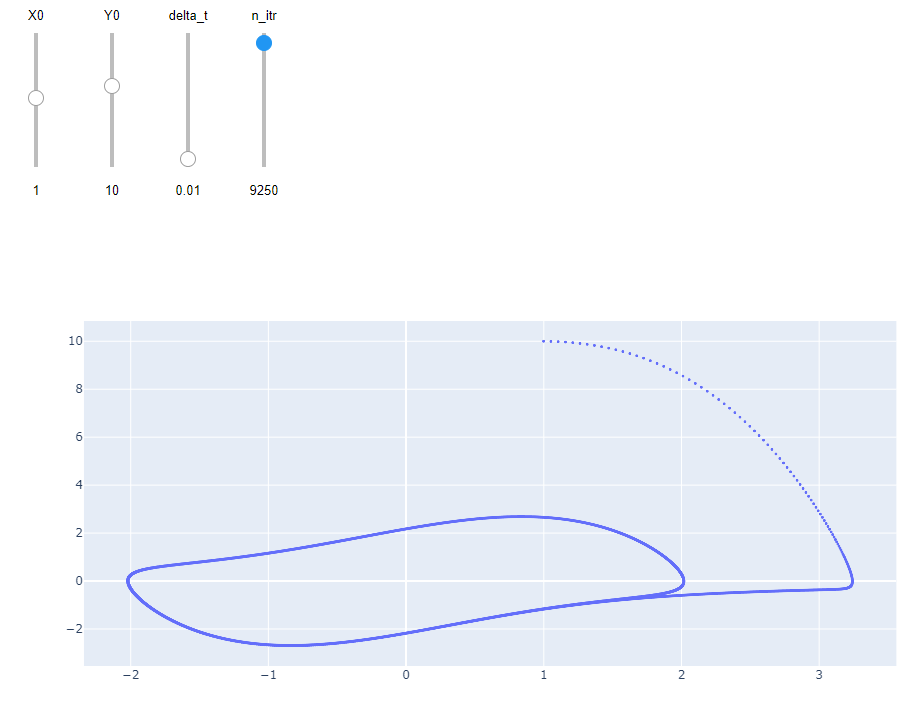

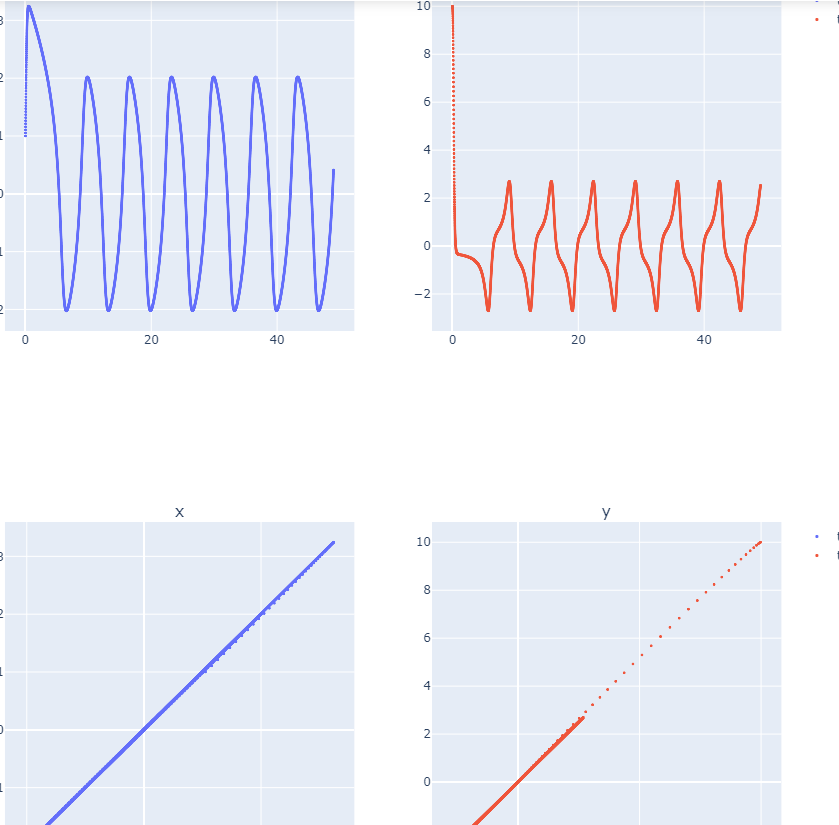

## another


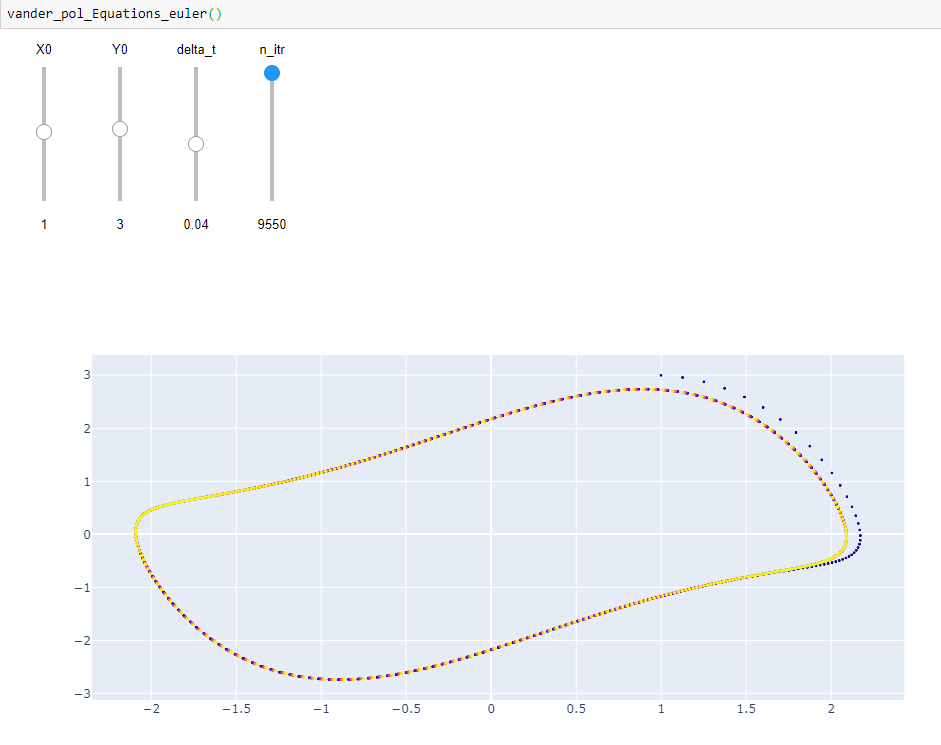

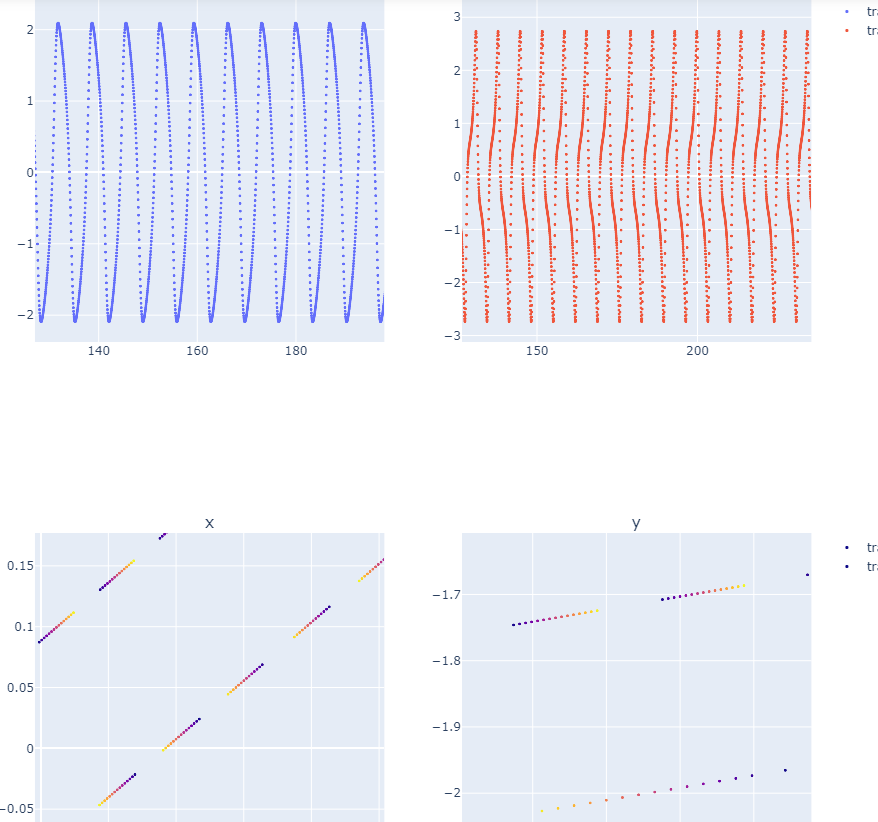

### Another

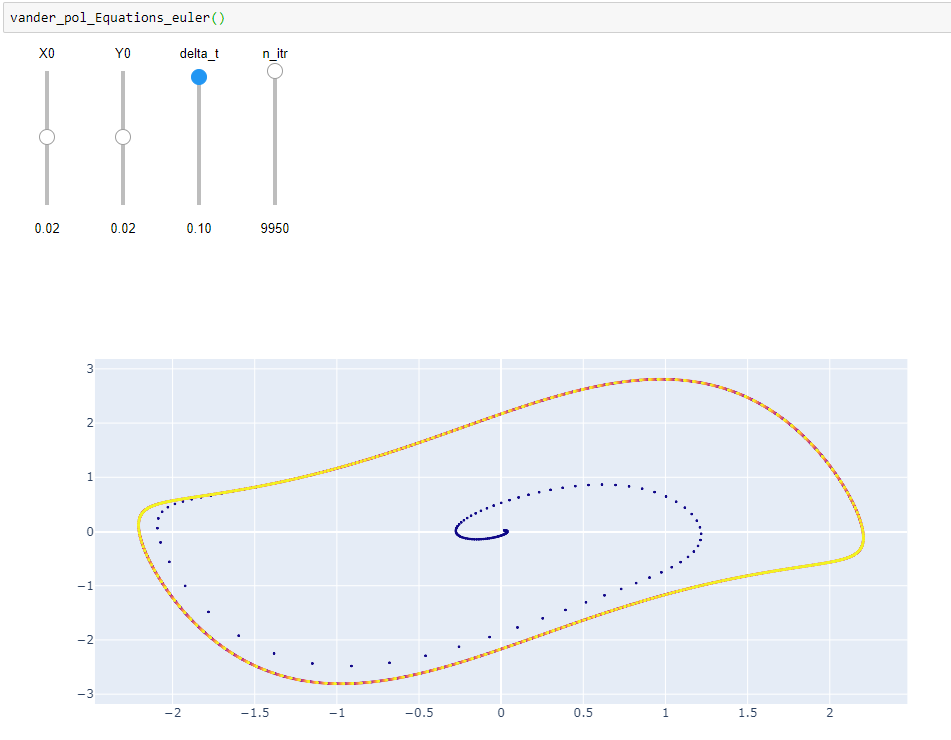

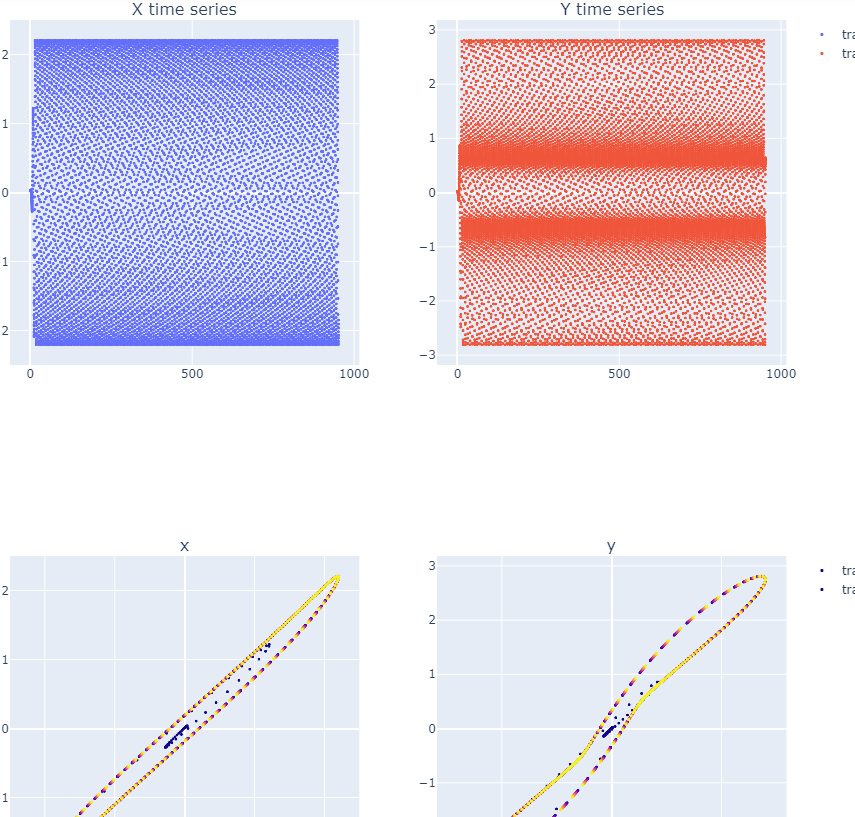